## PRE PROCESSING

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

df=pd.read_csv("gaming_total_v2.csv")

In [ ]:
# On ne conserve que les colonnes qui contiennent plus de 90% de valeurs non nulles
df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
print("Pourcentage de valeurs nulles:")
(df.isna().sum()/df.shape[0]).sort_values(ascending=True).round(2)*100

Pourcentage de valeurs nulles:


Name                       0.0
Platform                   0.0
Genre                      0.0
NA_Sales                   0.0
EU_Sales                   0.0
JP_Sales                   0.0
Other_Sales                0.0
Global_Sales               0.0
Publisher                  0.0
Year                       2.0
Meta_VP                   35.0
Meta_NP                   35.0
test_note_JVC             40.0
Meta_NUsers               40.0
Meta_VUsers               40.0
avis_count_JVC            45.0
avis_note_JVC             45.0
Support_JVC               56.0
Classification_Age_JVC    57.0
meta_score                69.0
user_review               69.0
Rank                      69.0
summary                   69.0
dtype: float64

<Axes: >

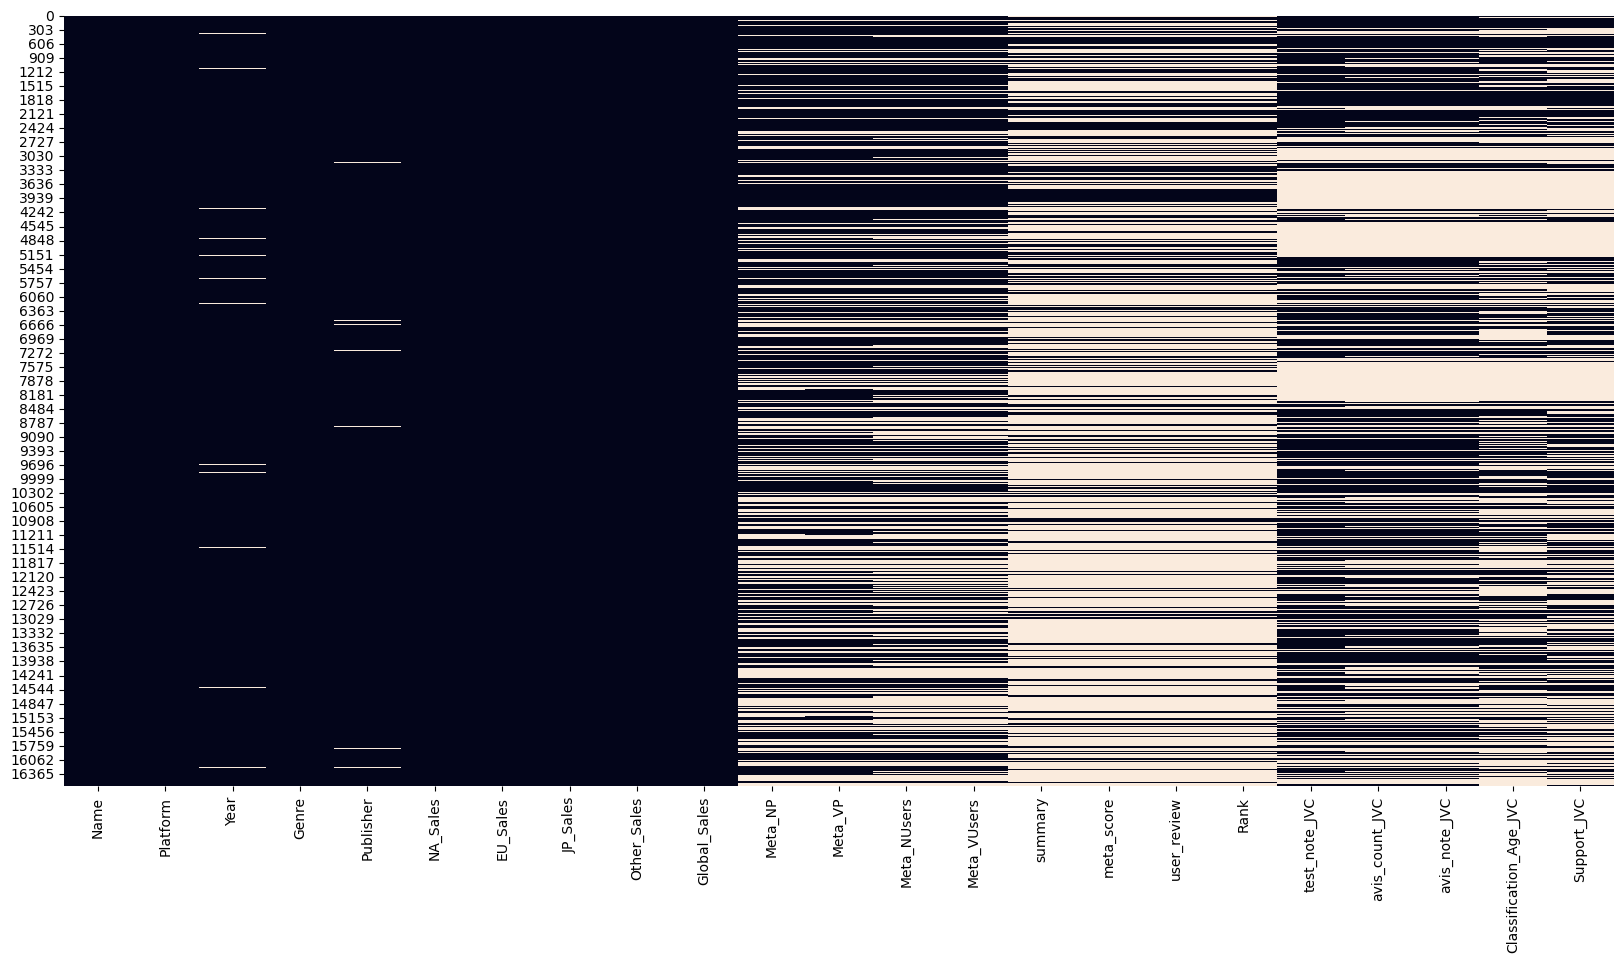

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

## Traitement des Nans

In [ ]:
missing_values = df.isnull().mean() * 100

print('Taux de valeurs manquantes pour chaque colonne :\n', round(missing_values, 2))
print("shape :",df.shape)

Taux de valeurs manquantes pour chaque colonne :
 Name                       0.00
Platform                   0.00
Year                       1.64
Genre                      0.00
Publisher                  0.35
NA_Sales                   0.00
EU_Sales                   0.00
JP_Sales                   0.00
Other_Sales                0.00
Global_Sales               0.00
test_note_JVC             39.79
avis_count_JVC            45.22
avis_note_JVC             45.22
Classification_Age_JVC    57.42
Support_JVC               55.80
dtype: float64
shape : (16471, 15)


In [ ]:
df= df.dropna(subset=['Year', 'Publisher', 'test_note_JVC', 'avis_count_JVC',
                      'avis_note_JVC', 'Classification_Age_JVC', 'Support_JVC'])

In [ ]:
duplicates = df.duplicated()
print('Il y a', sum(duplicates), 'doublons dans le jeu de données.')

missing_values = df.isnull().mean() * 100

print('Taux de valeurs manquantes pour chaque colonne :\n', round(missing_values, 2))
print("shape :",df.shape)

Il y a 0 doublons dans le jeu de données.
Taux de valeurs manquantes pour chaque colonne :
 Name                      0.0
Platform                  0.0
Year                      0.0
Genre                     0.0
Publisher                 0.0
NA_Sales                  0.0
EU_Sales                  0.0
JP_Sales                  0.0
Other_Sales               0.0
Global_Sales              0.0
test_note_JVC             0.0
avis_count_JVC            0.0
avis_note_JVC             0.0
Classification_Age_JVC    0.0
Support_JVC               0.0
dtype: float64
shape : (5246, 15)


In [ ]:
#df['Year']=pd.to_datetime(df['Year'], format='%Y')
df['Year']= df['Year'].astype('int')

In [ ]:
#df['Year']=df['Year'].str.extract('(\d{4})', expand=False)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,test_note_JVC,avis_count_JVC,avis_note_JVC,Classification_Age_JVC,Support_JVC
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,14.0,687.0,13.8,7.0,DVD
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,19.0,3.0,19.0,3.0,eShop Console Virtuelle Cartouche
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,16.0,3023.0,17.4,3.0,DVD
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,15.0,581.0,16.5,3.0,DVD
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,17.0,1370.0,17.4,3.0,Cartouche


In [ ]:
#df.to_csv('data_clean.csv')

## Selection de la colonne target

In [ ]:
target= df['Global_Sales']